All the imports

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng
%matplotlib inline

# Stationary multi-arm bandit

In [47]:
rng = default_rng(12345)

def generate_q_star(k):
    # Generate k values drawn from N(0, 1)
    return np.array([rng.standard_normal() for _ in range(k)])

def greedy_simple_average(qs, iter=100):
    k = qs.shape[0]
    Q = np.zeros(k)
    N = np.zeros(k)
    get_reward = lambda a : rng.normal(qs[a], 1)
    reward_vec = np.zeros(iter)
    for it in range(iter):
        a = np.argmax(Q)
        N[a] += 1
        reward = get_reward(a)
        reward_vec[it] = reward
        Q[a] = Q[a] + (reward - Q[a]) / N[a]
    return reward_vec

def egreedy_simple_average(qs, iter=100, eps=0):
    k = qs.shape[0]
    Q = np.zeros(k)
    N = np.zeros(k)
    get_reward = lambda a : rng.normal(qs[a], 1)
    reward_vec = np.zeros(iter)
    for it in range(iter):
        eps_sample = rng.uniform()
        # e-greedy policy
        a = rng.integers(0, k) if (eps_sample <= eps) else np.argmax(Q)
        N[a] += 1
        reward = get_reward(a)
        reward_vec[it] = reward
        Q[a] = Q[a] + (reward - Q[a]) / N[a]
    return reward_vec

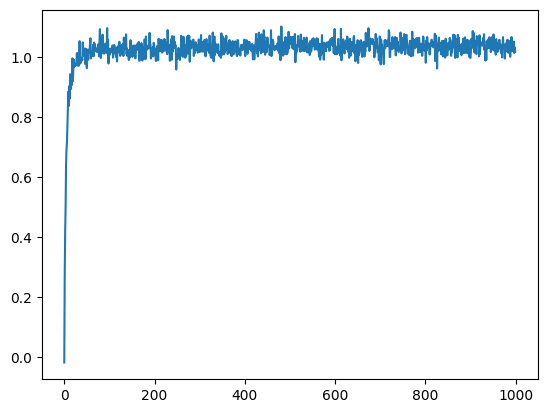

In [48]:
tot_runs = 2000
num_iters = 1000
avg_returns = np.zeros(num_iters)
for _ in range(tot_runs):
    q_star = generate_q_star(10)
    returns = greedy_simple_average(q_star, num_iters)
    avg_returns += returns

avg_returns /= tot_runs
fig, ax = plt.subplots()
ax.plot(avg_returns)

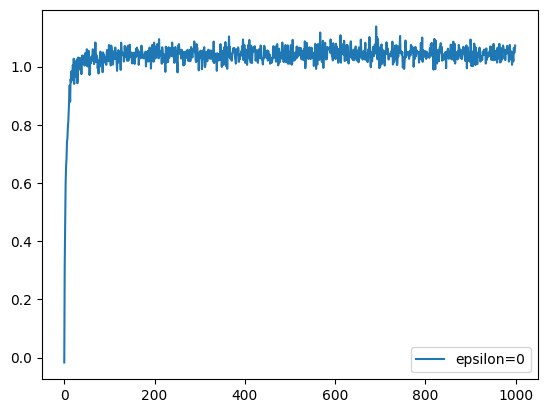

In [49]:
tot_runs = 2000
num_iters = 1000

fig, ax = plt.subplots()

def epsilon(eps):
    avg_returns = np.zeros(num_iters)
    for _ in range(tot_runs):
        q_star = generate_q_star(10)
        returns = egreedy_simple_average(q_star, num_iters, eps)
        avg_returns += returns
    avg_returns /= tot_runs

    ax.plot(avg_returns, label=f'epsilon={eps}')
    ax.legend()

epsilon(0)

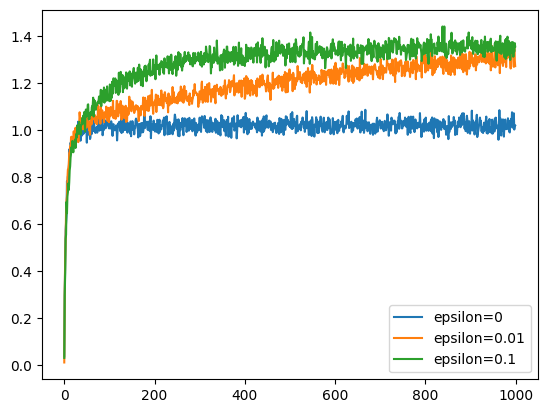

In [50]:
fig, ax = plt.subplots()
epsilon(0)
epsilon(0.01)
epsilon(0.1)

# Non-Stationary Multi-arm Bandit

In [65]:
def egreedy_simple_average_non_stationary(k, iter=100, eps=0.1):
    qs = generate_q_star(k)
    Q = np.zeros(k)
    N = np.zeros(k)
    get_reward = lambda a : rng.normal(qs[a], 1)
    reward_vec = np.zeros(iter)
    for it in range(iter):
        eps_sample = rng.uniform()
        # e-greedy policy
        a = rng.integers(0, k) if (eps_sample <= eps) else np.argmax(Q)
        N[a] += 1
        reward = get_reward(a)
        reward_vec[it] = reward
        Q[a] = Q[a] + (reward - Q[a]) / N[a]
        qs += np.array([rng.normal(0, 0.01) for _ in range(k)])
    return reward_vec

def egreedy_const_alpha_non_stationary(k, alpha=0.1, iter=100, eps=0.1):
    qs = generate_q_star(k)
    Q = np.zeros(k)
    N = np.zeros(k)
    get_reward = lambda a : rng.normal(qs[a], 1)
    reward_vec = np.zeros(iter)
    for it in range(iter):
        eps_sample = rng.uniform()
        # e-greedy policy
        a = rng.integers(0, k) if (eps_sample <= eps) else np.argmax(Q)
        N[a] += 1
        reward = get_reward(a)
        reward_vec[it] = reward
        Q[a] = Q[a] + alpha * (reward - Q[a])
        qs += np.array([rng.normal(0, 0.01) for _ in range(k)])
    return reward_vec

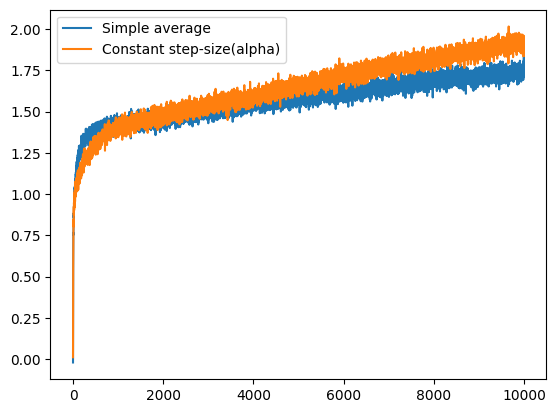

In [62]:
tot_runs = 2000
num_iters = 10000
k = 10
avg_returns = np.zeros(num_iters)
for _ in range(tot_runs):
    returns = egreedy_simple_average_non_stationary(k, num_iters)
    avg_returns += returns
avg_returns /= tot_runs

fig, ax = plt.subplots()
ax.plot(avg_returns, label='Simple average')
ax.legend()

avg_returns = np.zeros(num_iters)
for _ in range(tot_runs):
    returns = egreedy_const_alpha_non_stationary(k, iter=num_iters)
    avg_returns += returns
avg_returns /= tot_runs

ax.plot(avg_returns, label='Constant step-size(alpha)')
ax.legend()